# 定性的評価（可視化）

### pandas.DataFrameの `plot()`

In [1]:
import pandas as pd

df = pd.read_parquet("data/penguins.parquet")

# ペンギンのくちばしの長さ（横軸）とひれの長さ（縦軸）の散布図
df.plot(
    x="Culmen_Length",
    y="Flipper_Length",
    kind="scatter",
)

ImportError: Unable to find a usable engine; tried using: 'pyarrow', 'fastparquet'.
A suitable version of pyarrow or fastparquet is required for parquet support.
Trying to import the above resulted in these errors:
 - Missing optional dependency 'pyarrow'. pyarrow is required for parquet support. Use pip or conda to install pyarrow.
 - Missing optional dependency 'fastparquet'. fastparquet is required for parquet support. Use pip or conda to install fastparquet.

### Matplotlibを使ったグラフ描画

NameError: name 'df' is not defined

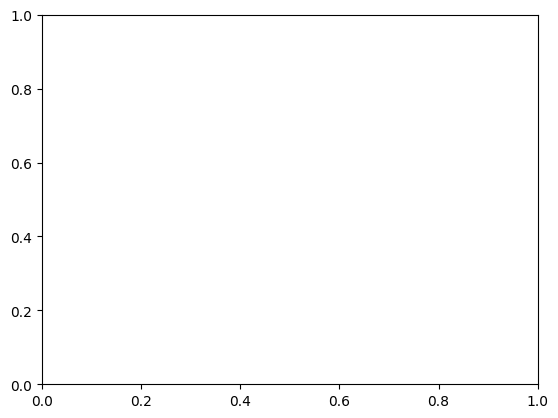

In [2]:
import matplotlib.pyplot as plt

# 準備（subplotsコンストラクターを呼び出してAxesクラスのインスタンスを生成）
_, ax = plt.subplots()

# くちばしの長さ（横軸）とひれの長さ（縦軸）の散布図
ax.scatter(
    x=df.loc[:, "Culmen_Length"],
    y=df.loc[:, "Flipper_Length"],
)
plt.show()

### Plotlyを使ったグラフ描画

In [3]:
import plotly.express as px

# くちばしの長さ（横軸）とひれの長さ（縦軸）の散布図
px.scatter(
    df,
    x="Culmen_Length",
    y="Flipper_Length",
)

ModuleNotFoundError: No module named 'plotly'

## グラフの種類

### 散布図

In [4]:
# くちばしの長さ（横軸）とひれの長さ（縦軸）の散布図
px.scatter(
    df,
    x="Culmen_Length",
    y="Flipper_Length",
)

NameError: name 'px' is not defined

In [5]:
px.scatter(
    df,
    x="Culmen_Length",
    y="Flipper_Length",
    color="Species_short",
    color_discrete_sequence=px.colors.qualitative.Dark2,
    symbol="Species_short",
)

NameError: name 'px' is not defined

### 折れ線グラフ

#### 平均体重の計算

In [6]:
df_avg_weight_year = (
    df.assign(year=df.loc[:, "Date_Egg"].dt.to_period("Y"))
    .groupby(["Species_short", "year"], as_index=False)["Body_Mass"]
    .mean()
)
df_avg_weight_year

NameError: name 'df' is not defined

#### 折れ線グラフの描画

In [7]:
fig_line = px.line(
    df_avg_weight_year.assign(
        year=lambda x: x.loc[:, "year"].dt.to_timestamp()
    ),
    x="year",
    y="Body_Mass",
    color="Species_short",
    color_discrete_sequence=px.colors.qualitative.Dark2,
    line_dash="Species_short",
    symbol="Species_short",
)

fig_line.update_yaxes(rangemode="tozero")  # 縦軸の最小値を0にする
fig_line.update_xaxes(
    tickformat="%Y", dtick="M12"
)  # 目盛に年だけを表示し、間隔を12か月に設定
fig_line.show()

NameError: name 'px' is not defined

### 棒グラフ

#### 平均体重の計算

In [8]:
df_avg_weight_island = df.groupby(
    ["Species_short", "Island"], as_index=False
)["Body_Mass"].mean()
df_avg_weight_island

NameError: name 'df' is not defined

#### 棒グラフの描画

In [9]:
px.bar(
    df_avg_weight_island,
    x="Species_short",
    y="Body_Mass",
    color="Island",
    color_discrete_sequence=px.colors.qualitative.Dark2,
    pattern_shape="Island",
    barmode="group",
)

NameError: name 'px' is not defined

### ヒストグラム

In [10]:
px.histogram(
    df,
    x="Body_Mass",
    color="Species_short",
    color_discrete_sequence=px.colors.qualitative.Dark2,
    pattern_shape="Species_short",
    opacity=0.7,
    barmode="overlay",
)

NameError: name 'px' is not defined

In [11]:
# 種ごとのヒストグラムを横に並べる
fig_col = px.histogram(
    df,
    x="Body_Mass",
    facet_col="Species_short",
)

NameError: name 'px' is not defined

In [12]:
import re

RE_TITLE = re.compile(
    r"(?<=Species_short=).+"
)  # 「Species_short=」に続く任意の文字列にマッチ
fig_col.for_each_annotation(
    lambda a: a.update(text=re.search(RE_TITLE, a.text)[0])
)
fig_col.show()

NameError: name 'fig_col' is not defined

In [13]:
import plotly.graph_objects as go

fig_col_notshared = go.Figure(fig_col)  # 元のオブジェクトをコピー

fig_col_notshared.update_xaxes(matches=None)
fig_col_notshared.update_yaxes(matches=None)
fig_col_notshared.for_each_yaxis(lambda y: y.update(showticklabels=True))
fig_col_notshared.show()

ModuleNotFoundError: No module named 'plotly'

In [14]:
fig_row = px.histogram(
    df,
    x="Body_Mass",
    facet_row="Species_short",
)
fig_row.for_each_annotation(
    lambda a: a.update(text=re.search(RE_TITLE, a.text)[0])
)
fig_row.update_xaxes(matches=None)
fig_row.update_yaxes(matches=None)
fig_row.for_each_xaxis(lambda x: x.update(showticklabels=True))
fig_row.show()

NameError: name 'px' is not defined

### 箱ひげ図

In [15]:
px.box(df, x="Species_short", y="Body_Mass")

NameError: name 'px' is not defined